In [1]:
###import the package we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

In [2]:
##set up alphas
alphas = 10**np.linspace(10,-2,100)*0.5

In [3]:
##load data
dat=pd.read_csv('/Users/jiaqitang/Downloads/Hitters.csv')
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
Unnamed: 0    322 non-null object
AtBat         322 non-null int64
Hits          322 non-null int64
HmRun         322 non-null int64
Runs          322 non-null int64
RBI           322 non-null int64
Walks         322 non-null int64
Years         322 non-null int64
CAtBat        322 non-null int64
CHits         322 non-null int64
CHmRun        322 non-null int64
CRuns         322 non-null int64
CRBI          322 non-null int64
CWalks        322 non-null int64
League        322 non-null object
Division      322 non-null object
PutOuts       322 non-null int64
Assists       322 non-null int64
Errors        322 non-null int64
Salary        263 non-null float64
NewLeague     322 non-null object
dtypes: float64(1), int64(16), object(4)
memory usage: 52.9+ KB


In [4]:
##filter the data for prediction and remove n/a
dat=dat[['AtBat','Hits','HmRun','Runs','RBI','Walks','Years','CAtBat','CHits','CHmRun','CRuns','CRBI','CWalks','PutOuts','Assists','Errors','Salary']]
dat=dat.dropna()

In [5]:
##get target and features
Y=dat.Salary
X=dat.drop('Salary',axis=1)

In [6]:
##normalized the data
X=preprocessing.normalize(X)
Y=preprocessing.scale(Y)


In [7]:
xlabs=['AtBat','Hits','HmRun','Runs','RBI','Walks','Years','CAtBat','CHits','CHmRun','CRuns','CRBI','CWalks','PutOuts','Assists','Errors','Salary']

In [8]:
##split data for train and test
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.3, random_state=31)

1.1
Use LASSO regression to predict Salary from the other numeric predictors.Create a visualization of the coefficient trajectories. 
Comment on which are the final three predictors that remain in the model. 

Use cross-validation to find the optimal value of the regularization penality. 
How many predictors are left in that model?


In [11]:
#Use LASSO regression to predict Salary 
lasso = Lasso(alpha=0.00001,max_iter = 10000, normalize = True)
lasso.fit(X_train,y_train)


Lasso(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

from the graph, the final three predictors that remain in the model are ['AtBat', 'Years', 'CRBI']


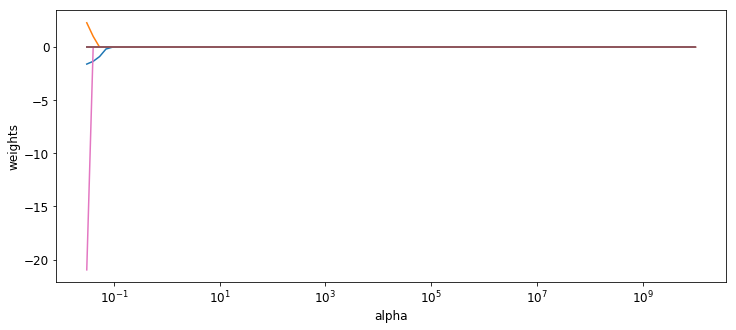

In [202]:
##visulize and feature selection
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []
i=0
for a in alphas:
    
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    i=i+1
    if(len(lasso.coef_[lasso.coef_ !=0.0])==3):
        break
    #print(lasso.coef_[lasso.coef_ != 0.0])
plt.figure(figsize=(12,5))    
ax = plt.gca()
ax.plot(alphas[0:i]*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
features_name=[xlabs[i] for i in np.where(lasso.coef_)[0]]
print("from the graph, the final three predictors that remain in the model are", features_name)

In [18]:
##Use cross-validation to find the optimal value of the regularization penality. 
from sklearn.metrics import mean_squared_error
lassocv = LassoCV(alphas = alphas, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

0.6425946380559222

from the graph, the final three predictors that remain in the model is 6


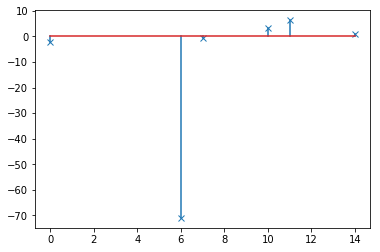

In [19]:
##visulize the results from cv
m, s, _ = plt.stem(np.where(lasso.coef_)[0], lasso.coef_[lasso.coef_ != 0],
                   markerfmt='x', label='Lasso coefficients')

print("from the graph, the number of  predictors that remain in the model is 6")

In [20]:
## ridge

ridge = Ridge(normalize = True)
#ridge.fit(X_train,y_train)
i=0
coefsrid=[]
for a in alphas:
    
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefsrid.append(ridge.coef_)
    i=i+1
    #if(len(ridge.coef_[ridge.coef_ !=0.0])==3):
        #break
    print(ridge.coef_[lasso.coef_ != 0.0])


[-6.19039522e-10 -3.39068176e-08  2.83584457e-10  2.68503397e-09
  2.57745886e-09 -9.83647327e-11]
[-8.18333816e-10 -4.48228173e-08  3.74881962e-10  3.54945688e-09
  3.40724893e-09 -1.30032387e-10]
[-1.08178914e-09 -5.92531266e-08  4.95571891e-10  4.69217311e-09
  4.50418256e-09 -1.71895163e-10]
[-1.43006158e-09 -7.83291462e-08  6.55116874e-10  6.20277670e-09
  5.95426426e-09 -2.27235289e-10]
[-1.89045725e-09 -1.03546521e-07  8.66025951e-10  8.19970575e-09
  7.87118692e-09 -3.00391677e-10]
[-2.49907322e-09 -1.36882407e-07  1.14483534e-09  1.08395284e-08
  1.04052459e-08 -3.97100117e-10]
[-3.30362772e-09 -1.80950487e-07  1.51340493e-09  1.43292186e-08
  1.37551227e-08 -5.24942981e-10]
[-4.36720142e-09 -2.39205894e-07  2.00063225e-09  1.89423837e-08
  1.81834626e-08 -6.93943720e-10]
[-5.77318324e-09 -3.16216114e-07  2.64471807e-09  2.50407164e-08
  2.40374674e-08 -9.17352747e-10]
[-7.63180845e-09 -4.18019092e-07  3.49616162e-09  3.31023532e-08
  3.17761171e-08 -1.21268632e-09]
[-1.008880

Text(0, 0.5, 'weights')

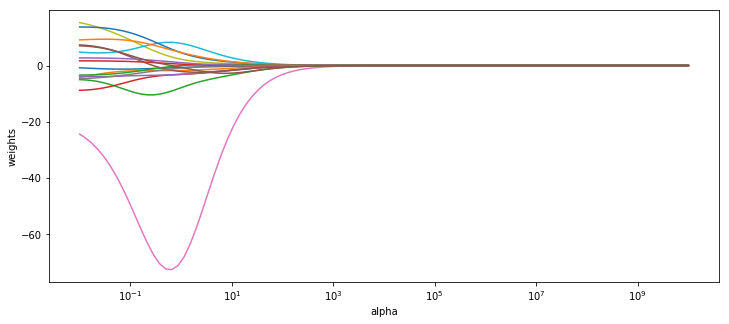

In [21]:
plt.figure(figsize=(12,5))    
ax = plt.gca()
ax.plot(alphas[0:i]*2, coefsrid)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
#features_name2=[xlabs[i] for i in np.where(ridge.coef_)[0]]
#print("from the graph, the final three predictors that remain in the model are", features_name2)

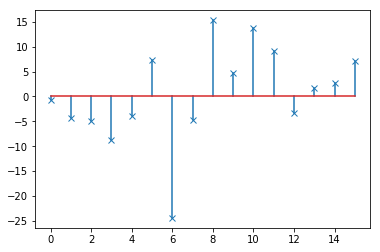

In [23]:
###visualization of the coefficient trajectories of ridge
m, s, _ = plt.stem(np.where(ridge.coef_)[0], ridge.coef_[ridge.coef_ != 0],
                   markerfmt='x', label='ridge coefficients')

In [26]:
####Use cross-validation to find the optimal value of the regularization penality for ridge
ridgecv = RidgeCV(alphas = alphas,normalize=True)
ridgecv.fit(X_train, y_train)
ridge.set_params(alpha=ridgecv.alpha_)
ridge.fit(X_train, y_train)
mean_squared_error(y_test, ridge.predict(X_test))

0.5394211648505962

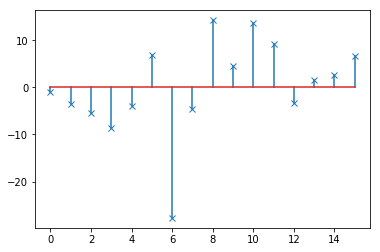

In [25]:
#####visualization of the coefficient trajectories of ridge with cv
m, s, _ = plt.stem(np.where(ridgecv.coef_)[0], ridgecv.coef_[ridgecv.coef_ != 0],
                   markerfmt='x', label='Lasso coefficients')

########2#########
##Short Answer. Explain in your own words the bias-variance tradeoff. What
role does regularization play in this tradeoff? Make reference to your findings
in number (1) to describe models of high/low bias and variance.

bias–variance tradeoff is that when we perform preditive models in statistics, the models with a lower bias have a higher variance, and vice versa.
Regularization plays a role for finding better model complexity for prediction. It uses the way that adding a penalty term to control the model complexity. 
from 1, we can tell when we use L1 regularization(Lasso) to add penalty would reduce the complexity(feature selection),but compared to the ridge regression which did not reduce the. complexity, lasso get higher mean squared error for test data , it means have higher bias. In this case, low variance tend to have high bias. 
